# Comparing Gene Expression in Different Patient Groups Side-by-Side

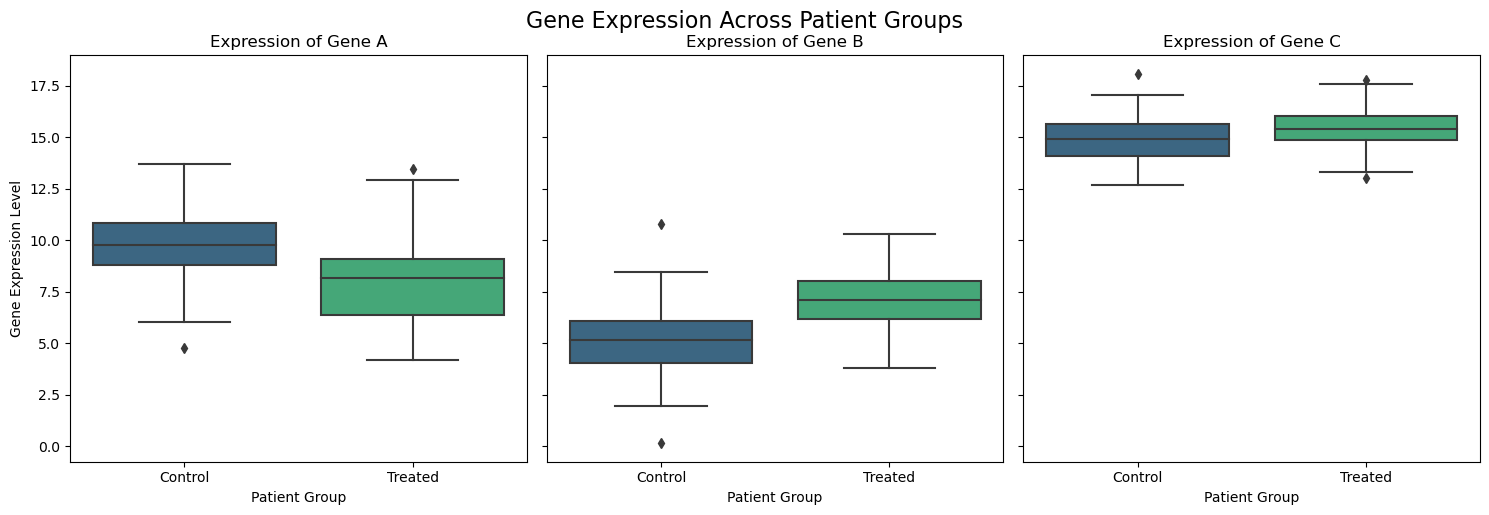

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Simulate Gene Expression Data
np.random.seed(42) # for reproducibility

# Data for Gene_A (e.g., slightly lower in Treated)
control_A = np.random.normal(loc=10, scale=2, size=100)
treated_A = np.random.normal(loc=8, scale=2, size=100)

# Data for Gene_B (e.g., higher in Treated)
control_B = np.random.normal(loc=5, scale=1.5, size=100)
treated_B = np.random.normal(loc=7, scale=1.5, size=100)

# Data for Gene_C (e.g., similar in both groups)
control_C = np.random.normal(loc=15, scale=1, size=100)
treated_C = np.random.normal(loc=15.5, scale=1, size=100)

# Create DataFrames for each gene/group
df_A = pd.DataFrame({'Expression': np.concatenate([control_A, treated_A]),
                     'Group': ['Control']*100 + ['Treated']*100})
df_B = pd.DataFrame({'Expression': np.concatenate([control_B, treated_B]),
                     'Group': ['Control']*100 + ['Treated']*100})
df_C = pd.DataFrame({'Expression': np.concatenate([control_C, treated_C]),
                     'Group': ['Control']*100 + ['Treated']*100})

# Put them in a list for easy iteration
genes_data = {'Gene A': df_A, 'Gene B': df_B, 'Gene C': df_C}

# 2. Use plt.subplots() to create a grid of plots
# We want 1 row and 3 columns (one for each gene), sharing the Y-axis for easier comparison of expression levels.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

# Flatten axes array for easier iteration if it's not 1D (e.g., if nrows > 1)
# For 1 row, axes is already 1D, but this is good practice for general use.
axes = axes.flatten()

# 3. Iterate through genes and plot their distributions in the respective subplots
for i, (gene_name, df_gene) in enumerate(genes_data.items()):
    ax = axes[i] # Get the current subplot axis

    # Plot the distribution using seaborn's boxplot for clarity across groups
    sns.boxplot(data=df_gene, x='Group', y='Expression', ax=ax, palette='viridis')

    ax.set_title(f'Expression of {gene_name}')
    ax.set_xlabel('Patient Group')
    if i == 0: # Only set Y-label for the first plot if sharing Y-axis
        ax.set_ylabel('Gene Expression Level')
    else:
        ax.set_ylabel('') # Remove redundant Y-label for subsequent plots

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()
plt.suptitle('Gene Expression Across Patient Groups', y=1.02, fontsize=16) # Overall title
plt.show()

# Plotting with Seaborn

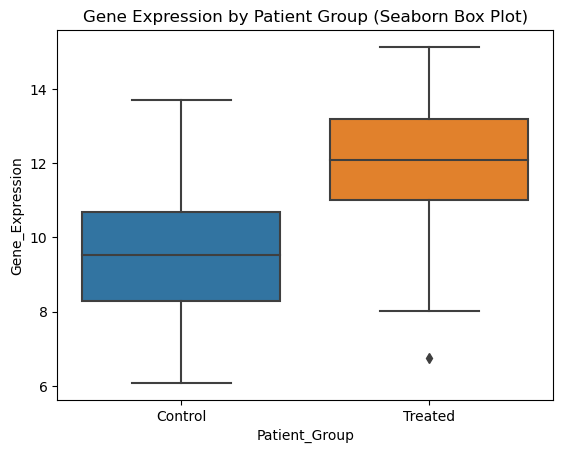

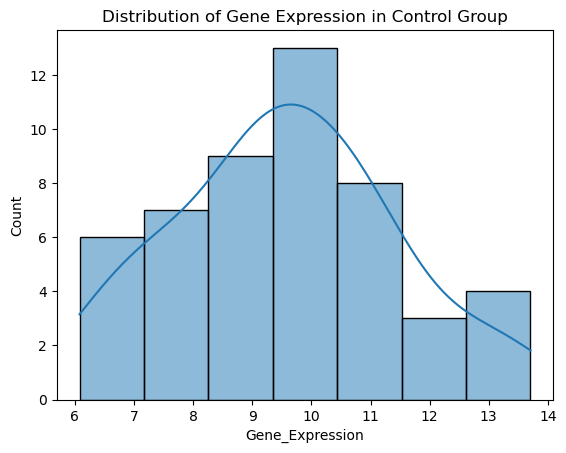

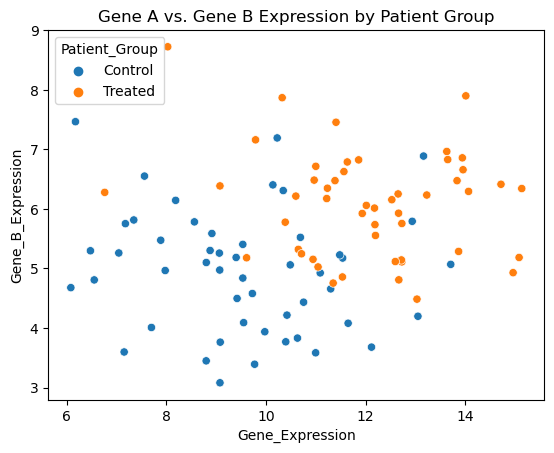

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate some data
np.random.seed(42)
data = {
    'Gene_Expression': np.concatenate([np.random.normal(loc=10, scale=2, size=50),
                                       np.random.normal(loc=12, scale=2, size=50)]),
    'Patient_Group': ['Control'] * 50 + ['Treated'] * 50
}
df = pd.DataFrame(data)

# --- The Seaborn One-Liner ---
# Option 1: Box plot to show distribution per group
sns.boxplot(data=df, x='Patient_Group', y='Gene_Expression')
plt.title('Gene Expression by Patient Group (Seaborn Box Plot)')
plt.show()

# Option 2: Histogram to show distribution (you'd typically do this for one group at a time, or use FacetGrid)
# Let's just pick one group for a simple one-liner example
sns.histplot(data=df[df['Patient_Group'] == 'Control'], x='Gene_Expression', kde=True)
plt.title('Distribution of Gene Expression in Control Group')
plt.show()

# Option 3: Scatter plot for two continuous variables with aesthetic mapping
# Let's add another gene for this example
df['Gene_B_Expression'] = np.concatenate([np.random.normal(loc=5, scale=1, size=50),
                                          np.random.normal(loc=6, scale=1, size=50)])

sns.scatterplot(data=df, x='Gene_Expression', y='Gene_B_Expression', hue='Patient_Group')
plt.title('Gene A vs. Gene B Expression by Patient Group')
plt.show()

# Colour bar in data visualisation

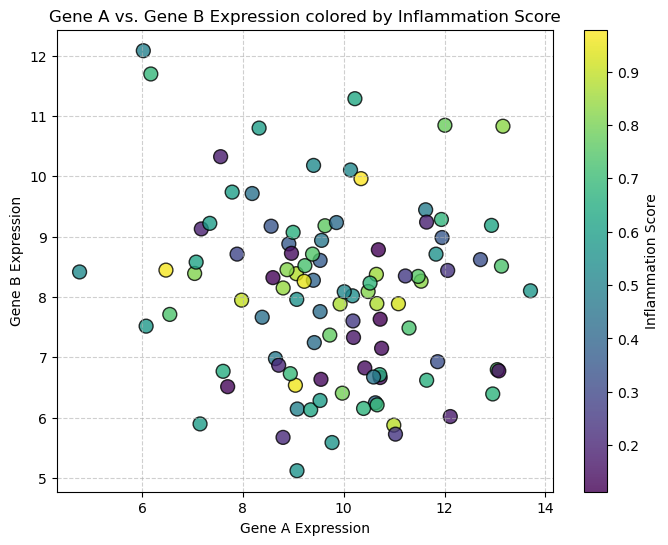

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Simulate data
np.random.seed(42)
data = {
    'Gene_A_Expression': np.random.normal(loc=10, scale=2, size=100),
    'Gene_B_Expression': np.random.normal(loc=8, scale=1.5, size=100),
    'Inflammation_Score': np.random.uniform(low=0.1, high=1.0, size=100) # Third variable
}
df = pd.DataFrame(data)

# Create a scatter plot where point color represents Inflammation_Score
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Gene_A_Expression'], df['Gene_B_Expression'],
                      c=df['Inflammation_Score'], cmap='viridis', s=100, alpha=0.8, edgecolor='black')

# Add the colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Inflammation Score') # Label the colorbar

plt.xlabel('Gene A Expression')
plt.ylabel('Gene B Expression')
plt.title('Gene A vs. Gene B Expression colored by Inflammation Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()